# PRÁCTICA 4 - REGRESIÓN NO PARAMÉTRICA

Notebook diseñado por Inmaculada Mora, considerando aportaciones de Felipe Alonso.

Fecha de entrega: 22 de Diciembre de 2020 (23.59h), a través de Aula Virtual.

En esta práctica se consideran tres esquemas de regresión no paramética:

- Regresor de los k vecinos más próximos o k-NN
- Árboles de regresión
- Regresor de tipo Perceptrón Multicapa o MLP

Puede ser conveniente instalar PyDotPlus en Anaconda. Para ello, puede abrir un terminal y lanzar la siguiente línea de comando: >>conda install pydotplus

Si al ejecutar la función GridSearch os diera un error, tendréis que incluir la opción "return_train_score=True"

Las indicaciones del material a entregar aparecen identificadas en varios puntos del notebook con la palabra "Entrega". Se puede tratar: 
- de código, que debe incluir en una celda concreta;
- de cuestiones teórico prácticas,a  las que debe responder también en una celda concreta del notebook

In [1]:
# Comenzamos importando los paquetes básicos
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Función para detectar outliers, utilizada posteriormente
def outliers (datos): #Función z-score
    count=0
    lista=[]
    for i in pima_indians_df[datos]:
        if not (pima_indians_df[datos].mean()-2.5*pima_indians_df[datos].std())<=i<=(pima_indians_df[datos].mean()+2.5*pima_indians_df[datos].std()):
            if not np.isnan(i):
                count=count+1
                lista.append(i)
   
    return lista

# 1. Cargar fichero de observaciones. Elegir una variable de entrada y otra variable de salida al regresor

Continuaremos trabajando en esta práctica con el fichero 'pima_indian_diabetes.csv', del que descartaremos la variable "Outcome" (utilizada hasta la fecha como target de las observaciones para entrenar un modelo de clasificación).  

Inicialmente, diseñaremos regresores con una única variable de entrada y una única variable de salida, ambas de naturaleza numérica (continua). Ello permitirá representar gráficamente la función de regresión aprendida con cada esquema. 

Como variable de entrada, consideraremos la variable glucosa.

Como variable de salida, consideraremos la variable insulina.

Si el estudiante tiene interés en diseñar el regresor con otras variables, debe indicarlo al principio de la entrega de su resolución.



In [3]:
# Leemos lel fichero y extraemos las variables de interés
pima_indians_df = pd.read_csv('pima_indian_diabetes.csv')

glucosa = pima_indians_df.iloc[:, 1]
insulina = pima_indians_df.iloc[:, 4]
BMI = pima_indians_df.iloc[:, 5]

## Entrega

Responda razonadamente a las siguientes cuestiones:

- **¿En qué se diferencia un regresor paramétrico de un regresor no paramétrico?**

   El regresor paramétrico se basa en diseñar el modelo a partir de una función específica, es decir, realiza una suposición de la forma funcional del modelo (lineal, cuadrática, exponencial...). En cambio, un regresor no paramétrico no asume una forman funcional del modelo, sino que  busca un modelo que aproxime lo mejor posible a los datos, sin sub-ajustar ni sobreajustar.


- **Para el caso aquí considerado (1 variable de entrada y 1 variable de salida al modelo), discuta sobre la necesidad o no de la normalización de características (de entrada y salida) para cada uno de los esquemas de regresión no paramétricos indicados al inicio de la práctica.**

    En kNN no es necesario normalizar la característica de entrada ya que solo contamos con una variable de entrada. Esto se debe a que a la hora de realizar las distancias euclídeas para determinar los vecinos más próximos, se tiene en cuenta una sola carácterística, es decir, únicamente depende del rango dinámico de una variable.
    Por otro lado, la característica de salida no será necesario normalizarla ya que todas las salidas estimadas se encontrarán en la misma magnitud.
    
    En el árbol de regresión, no es necesario normalizar la característica de entrada porque las particiones del árbol se realizan teniendo en cuenta, cada vez, una sola variable. Por otro lado, en la característica de salida tampoco es necesaria ya que todas las salidas estimadas se encontrarán en la misma magnitud; en nuestro caso *mu U/ml*. En este caso, al calcular el MSE para elegir el nodo tanto la salida predicha como la deseada están en la misma magnitud.
    
    En el regresor MLP no es necesario normalizar, ya que solo se cuenta con una variable de entrada. Sin embargo, puede ser conveniente hacer la normalización de una sola variable debido a que las funciones de activación saturan. Es posible, que en función de como sean los pesos sinápticos en la inicialización de la red, dichas funciones se puedan saturar si son valores muy grandes y en realidad, si se hubieran normalizado no se saturarían. En este caso, y dependiendo de la funcion de activación utilizada, la característica de salida puede ser conveniente normalizarla.
    

Representaciones gráficas

En una misma figura, realizaremos las siguientes representaciones gráficas, etiquetando adecuadamente cada uno de los ejes:
- histograma de la glucosa
- histograma de la insulina
- scatter plot entre las variables glucosa e insulina


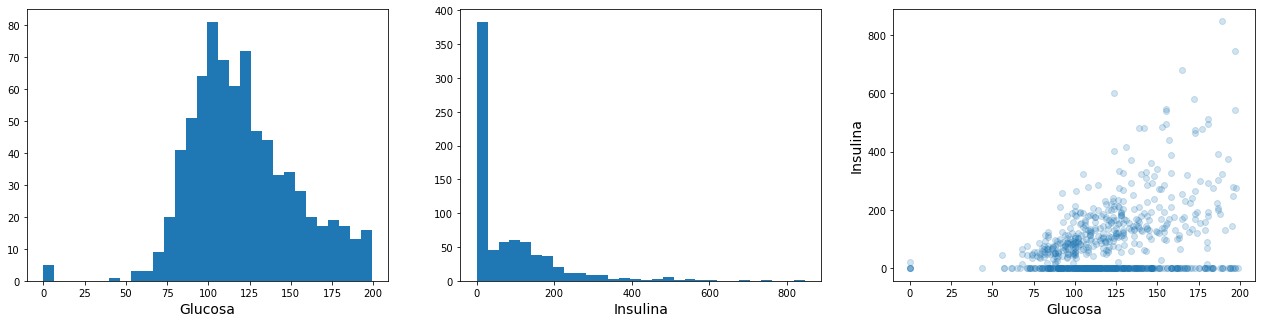

In [4]:
# Representaciones gráficas

plt.figure(figsize=(22,5))

plt.subplot(1,3,1)
plt.hist(glucosa,bins=30)
plt.xlabel('Glucosa',fontsize=14)

plt.subplot(1,3,2)
plt.hist(insulina,bins=30)
plt.xlabel('Insulina',fontsize=14)

plt.subplot(1,3,3)
plt.scatter(glucosa,insulina,alpha=0.2)
plt.xlabel('Glucosa',fontsize=14)  
plt.ylabel('Insulina',fontsize=14) 

plt.show()

## Entrega

A la vista de las representaciones gráficas, justifique razonadamente:

- **¿Qué tipo de relación (lineal, no lineal) considera que tienen las variables Glucosa e Insulina?**

    Las variables Glucosa e Insulina tienen una relación no lineal, porque el conjunto de observaciones no sigue una recta, como se puede observar en el scatter plot, sino que parece que sigue una forma de exponencial.
    

- **¿Qué representan los valores nulos en la glucosa? ¿y en la insulina?**
    
    Los valores nulos de la Glucosa y de la Insulina se corresponden a valores perdidos, los ceros que se pueden observar en el scatter plot, ya que no cobran sentido en esta característica.
    

- **Para diseñar un modelo de regresión basado en k-nn, ¿considera necesario normalizar alguna característica? En caso afirmativo, ¿cuál? ¿por qué?**

     Para diseñar un modelo de regresión basado en k-nn no es necesario normalizar la característica de entrada Glucosa ya que solo contamos con una variable de entrada. Esto se debe a que las distancias euclídeas únicamente dependen del rango dinámico de una variable. Por otro lado, la característica de salida Insulina no será necesario normalizarla ya que todas las salidas estimadas se encontrarán en la misma magnitud.

## Entrega

**Si considera que los valores nulos no son adecuados, explique qué podría hacer (y cómo) para no disponer de valores nulos sin reducir el número de ejemplos.**


Para no disponer de valores nulos sin reducir el número de ejemplos, se sigue el siguiente procedimiento: en primer lugar, todos los valores nulos se reemplazan a valores NaN para que sean ignorados en el cálculo del estadístico por el que se va a imputar. En segundo lugar se reemplazan los NaN (missing values detectados) por el estadítico mediana.

No obstante, al tener tan elevada cantidad de missing values en la característica de Insulina al imputar éstos por la mediana puede llevar a que los modelos tiendan a predecir el valor de insulina como el valor de la mediana porque es el valor que más han aprendido (valor de insulina más abundante de las observaciones).

En esta parte también se han imputado los outliers para obtener mejores resultados en los modelos que se diseñarán a continuación.

In [5]:
pima_indians_df[["Glucose","Insulin"]] = pima_indians_df[["Glucose","Insulin"]].replace(0, np.nan)

In [6]:
#Se imputan también los outliers para obtener mejores resultados en el diseño de los modelos
for i in pima_indians_df[["Glucose","Insulin"]]:
    pima_indians_df[[i]]=pima_indians_df[[i]].replace(outliers(i),np.nan)

In [7]:
pima_indians_df.fillna(pima_indians_df.median(), inplace=True) 

In [8]:
glucosa = pima_indians_df.iloc[:, 1]
insulina = pima_indians_df.iloc[:, 4]

# 2. Regresor k-nn uni-dimensional

En esta sección realizaremos la representación gráfica del modelo de regresión k-nn básico (sin ponderación con la distancia) más adecuado al conjunto de observaciones disponible, estimando dos figuras de mérito (MAE y MSE) sobre un conjunto de test independiente del conjunto de diseño. 

El modelo sobre el que evaluar las prestaciones del conjunto de test se seleccionará conforme al mínimo valor de MSE en validación (3-fold cross validation).

Realizaremos la representación gráfica de la función de regresión resultante, superpuesta al scatter plot y para el dominio de la variable independiente representado en el scatter plot anterior.


In [9]:
# Cargamos las librerías necesarias en sklearn 

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, max_error  # Figura de mérito 


In [10]:
# 1. Separamos el conjunto de diseño (X_train, y_train) y de test (X_test, y_test): particiones 80/20

X_train, X_test, y_train, y_test = train_test_split(glucosa, insulina, test_size = 0.2, random_state=2)
#print(X_train.shape)
#print(y_train.shape)
#print(X_test.shape)
#print(y_test.shape)


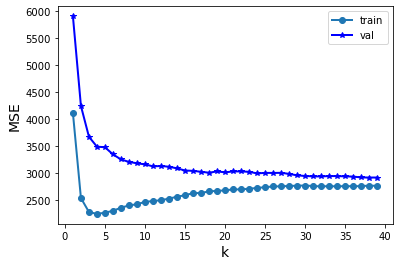

Menor MSE en validación: 2912.714
Mejor valor del hiperparámetro: {'n_neighbors': 39}


In [11]:
# 2. Selección del hiper-parámetro haciendo uso del conjunto de diseño. El criterio de elección es mínimo MSE

param_grid = {'n_neighbors': range(1,40)}
k_grid = np.array(range(1,40))
grid_knn = GridSearchCV(KNeighborsRegressor(), param_grid = param_grid, scoring = 'neg_mean_squared_error', cv=3, return_train_score=True)
grid_knn.fit(X_train.values.reshape(-1,1), y_train.values.reshape(-1,1))

mse_train = -1*np.array(grid_knn.cv_results_['mean_train_score'])
mse_val = -1*np.array(grid_knn.cv_results_['mean_test_score'])


plt.plot(k_grid,mse_train,'-o',label="train", linewidth=2)
plt.plot(k_grid,mse_val,'-*b',label="val", linewidth=2)
plt.xlabel('k',fontsize=14)
plt.ylabel('MSE',fontsize=14)
plt.legend()
plt.show()

print("Menor MSE en validación: {:.3f}".format(-grid_knn.best_score_))
print("Mejor valor del hiperparámetro: {}".format(grid_knn.best_params_))



El valor más adecuado de k vecinos determinado por cross validation es 39. Sin embargo, visualizando la gráfica apenas hay cambio en el MSE a partir de, aproximadamente, 30 vecinos más próximos. Es por ello, que para diseñar el modelo kNN se elige un valor de k=30.

In [12]:
# Con el valor de k seleccionado, construimos el modelo con el conjunto de diseño y evaluamos las prestaciones en test
n_neighbors = 30
modelo_knn_regres = KNeighborsRegressor(n_neighbors) 
y_test_estimada = modelo_knn_regres.fit(X_train.values.reshape(-1,1), y_train.values.reshape(-1,1)).predict(X_test.values.reshape(-1,1)) # Entrenamos y evaluamos en test


MAE_test_knn_1D = mean_absolute_error(y_test.values.reshape(-1,1), y_test_estimada)
MSE_test_knn_1D = mean_squared_error(y_test.values.reshape(-1,1), y_test_estimada)


print(MAE_test_knn_1D)
print(MSE_test_knn_1D)

39.472727272727276
2981.4309523809525


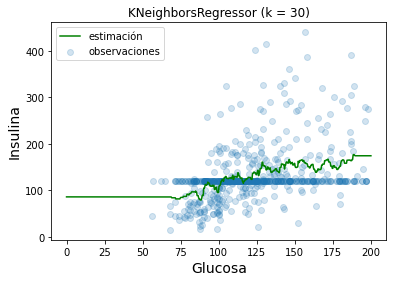

In [13]:
# Con el modelo ya diseñado,  evaluamos una malla unidimensional para realizar la representación de la función de regresión
# creamos la malla T sobre la que evaluar la función de regresión

T = np.linspace(0,200,600)[:, np.newaxis]
y_ = modelo_knn_regres.predict(T) 

# Representamos las estimaciones sobre el subconjunto de diseño
plt.scatter(X_train.values.reshape(-1,1), y_train.values.reshape(-1,1), alpha=0.2, label='observaciones')
plt.plot(T, y_, c='g', label='estimación')
plt.xlabel('Glucosa',fontsize=14)  
plt.ylabel('Insulina',fontsize=14) 
plt.axis('tight')
plt.legend()
plt.title("KNeighborsRegressor (k = %i)" % (n_neighbors))
plt.show()


## Entrega

Explique y justifique razonadamente:

- **¿Cree que habría sido necesario realizar una etapa previa de normalización? En caso afirmativo, ¿qué características habría normalizado?**

    No habría sido necesario normalizar la característica Glucosa ya que las distancias euclídeas únicamente dependen del rango dinámico de una variable. Por otro lado, la característica Insulina tampoco habría sido necesario normalizarla ya que todas las salidas estimadas se encontrarían en la misma magnitud.
    

- **¿Qué tipo de modelo se ha obtenido: un modelo lineal, o no lineal?**

    Se ha obtenido un modelo no lineal, ya que la representación de la función de regresión (linea verde) de la última figura no sigue una línea recta.
    

- **Siguiendo los contenidos presentados en las sesiones teóricas, ¿qué valor del MAE y del MSE se debería haber obtenido para k=1 cuando se evalúa el conjunto de entrenamiento? Intente explicar por qué no se obtiene el resultado esperado.** 

    Teóricamente, para un valor k=1 se debería haber obtenido un valor de MAE y de MSE igual a cero en la curva de train, ya que el modelo se ajustaría perfectamente a cada observación, es decir, habría memorizado los datos de train. Sin embargo, en este caso para k=1 hay un error mayor que cero debido a la dispersión de los datos de Insulina para un mismo valor de Glucosa. Por tanto, el modelo no ajustaría perfectamente a cada una de las observaciones del conjunto de train.
    

- **De las presentadas en los contenidos teóricos de la asignatura, ¿qué otras figuras de mérito, expresadas en las mismas unidades que la variable de salida, considera adecuado evaluar? Incluya el código y obtenga los valores correspondientes para la partición de test.** 

    Otras figuras de mérito que están expresadas en las mismas unidades que la variable de salida son la raíz cuadrada del error cuadrático medio (RMSE) y el error máximo. 
    

- **Justifique cómo sería la función de regresión si k=1.**

    La función de regresión si k=1 tendría muchos picos y valles. La representación de la función de regresión estaría sobreajustada ya que al solo tener en cuenta un vecino, el modelo memorizaría los datos de entrenamiento. Esto se puede observar en la primera gráfica representada abajo.


- **Justifique cómo sería la función de regresión si el valor de k coincidiera con el número de observaciones disponibles.**

     Si el valor de k coincidiera con el número de observaciones disponibles, se obtendría una función de regresión constante para todos las observaciones de Glucosa perdiendo el caracter local que presentan los regresores knn. Esto se debe a que la estimación de la salida para cada una de las nuevas observaciones se calcula como la media aritmética de todas las observaciones de entrenamiento. Esto se puede observar en la segunda gráfica representada abajo.

RMSE: 54.6024811925333
Error máximo: 221.76666666666668


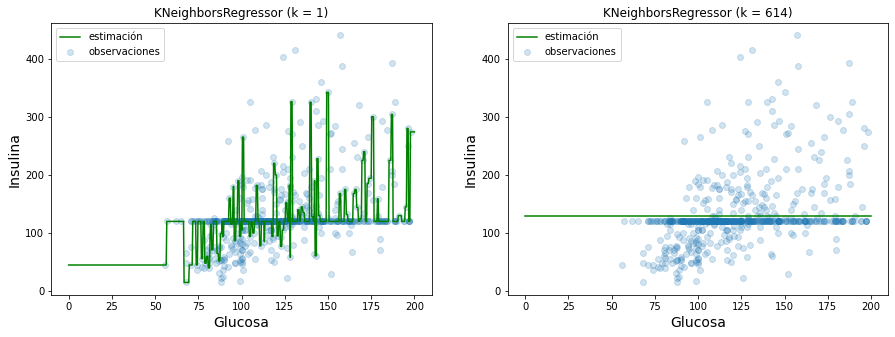

In [14]:
# Código a incluir para abordar la entrega de la celda anterior

# Diferentes figuras de mérito
RMSE_test_knn_1D = mean_squared_error(y_test.values.reshape(-1,1), y_test_estimada, squared=False)
ME_test_knn_1D = max_error(y_test.values.reshape(-1,1), y_test_estimada)

print('RMSE:',RMSE_test_knn_1D)
print('Error máximo:',ME_test_knn_1D)


#J ustificación para k=1
n_neighbors1 = 1
modelo_knn1 = KNeighborsRegressor(n_neighbors1) 
y_test_estimada1 = modelo_knn1.fit(X_train.values.reshape(-1,1), y_train.values.reshape(-1,1)).predict(X_test.values.reshape(-1,1)) # Entrenamos y evaluamos en test

# Justificación para k igual al número de observaciones de train
n_neighbors2 = np.shape(X_train)[0]
modelo_knn2 = KNeighborsRegressor(n_neighbors2) 
y_test_estimada2 = modelo_knn2.fit(X_train.values.reshape(-1,1), y_train.values.reshape(-1,1)).predict(X_test.values.reshape(-1,1)) # Entrenamos y evaluamos en test

# Representación grafica
T = np.linspace(0,200,600)[:, np.newaxis]
y1 = modelo_knn1.predict(T) 
y2 = modelo_knn2.predict(T) 

# Representamos las estimaciones sobre el subconjunto de diseño
plt.figure(figsize=(15,5))

# k = 1
plt.subplot(121)
plt.scatter(X_train.values.reshape(-1,1), y_train.values.reshape(-1,1), alpha=0.2, label='observaciones')
plt.plot(T, y1, c='g', label='estimación')
plt.xlabel('Glucosa',fontsize=14)  
plt.ylabel('Insulina',fontsize=14) 
plt.axis('tight')
plt.legend()
plt.title("KNeighborsRegressor (k = %i)" % (n_neighbors1))


# k = número de observaciones disponibles
plt.subplot(122)
plt.scatter(X_train.values.reshape(-1,1), y_train.values.reshape(-1,1), alpha=0.2, label='observaciones')
plt.plot(T, y2, c='g', label='estimación')
plt.xlabel('Glucosa',fontsize=14)  
plt.ylabel('Insulina',fontsize=14) 
plt.axis('tight')
plt.legend()
plt.title("KNeighborsRegressor (k = %i)" % (n_neighbors2))
plt.show()

# 3. Árbol de regresión con una variable de entrada

En esta sección realizaremos el diseño la representación gráfica del árbol de regresión más adecuado al conjunto de observaciones disponible, obteniendo dos figuras de mérito (MAE y MSE) sobre un conjunto de test independiente del conjunto de diseño (el mismo que en la sección anterior). 

El modelo sobre el que evaluar las prestaciones del conjunto de test se seleccionará conforme al mínimo valor de MSE en validación (3-fold cross validation).

Realizaremos la representación gráfica de la función de regresión resultante, superpuesta a la función de regresión obtenida con k-nn en el apartado anterior.


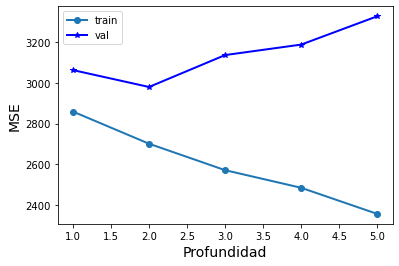

Menor MSE en validación cruzada: 2979.483
Mejor valor del hiperparámetro: {'max_depth': 2}


In [15]:
from sklearn.tree import DecisionTreeRegressor

# Selección de hiper-parámetros del árbol. En principio, consideraremos sólo la profundidad máxima
param_grid = {'max_depth': range(1,6)}
profundidad_grid = np.array(range(1,6))

grid_arbol = GridSearchCV(DecisionTreeRegressor(random_state=0), param_grid = param_grid, scoring = 'neg_mean_squared_error', cv=3, return_train_score=True)
grid_arbol.fit(X_train.values.reshape(-1,1), y_train.values.reshape(-1,1))

mse_train_arbol = -1*np.array(grid_arbol.cv_results_['mean_train_score'])
mse_val_arbol = -1*np.array(grid_arbol.cv_results_['mean_test_score'])

plt.plot(profundidad_grid,mse_train_arbol,'-o',label="train", linewidth=2)
plt.plot(profundidad_grid,mse_val_arbol,'-*b',label="val", linewidth=2)
plt.xlabel('Profundidad',fontsize=14)
plt.ylabel('MSE',fontsize=14)
plt.legend()
plt.show()

print("Menor MSE en validación cruzada: {:.3f}".format(-grid_arbol.best_score_))
print("Mejor valor del hiperparámetro: {}".format(grid_arbol.best_params_))


In [16]:
# Con el valor de máxima profundidad seleccionado, construimos el modelo con el conjunto de diseño y evaluamos las prestaciones en test
from sklearn.tree import export_graphviz
from pydotplus import graph_from_dot_data

# Construyo el modelo con los ejemplos de train 
param_max_depth=2
Regresor_Arbol_1D = DecisionTreeRegressor(max_depth=param_max_depth)
Regresor_Arbol_1D.fit(X_train.values.reshape(-1,1), y_train.values.reshape(-1,1))

# Represento visualmente el árbol
Nombres_Caract_In = ['Glucose']

dot_data_1 = export_graphviz(Regresor_Arbol_1D,
                           feature_names=Nombres_Caract_In)

graph = graph_from_dot_data(dot_data_1)
graph.write_png('Tree_Glucosa.png')

True

## Entrega

Explique y justifique razonadamente:

- **Justifique por qué disminuye el MSE en el conjunto de entrenamiento a medida que aumenta la profundidad del árbol. ¿Considera que seguiría disminuyendo si se exploraran valores de la profundidad aún más altos?**

    La curva de entrenamiento sigue un comportamiento descendente. Cuanto más alto son los valores de profundidad del árbol se consigue un menor MSE, pues el regresor se esta diseñando en base a los datos de entrenamiento, creando relaciones muy específicas y fronteras cada vez más ajustadas a dichos datos.


- **Visualice el árbol construido e incluya en la entrega la imagen generada. Indique cuántos valores distintos puede ofrecer el modelo. ¿Cómo ha obtenido estos valores?**

<img src="Tree_Glucosa.png">

    
  El árbol de regresión que se ha contruido ofrece cuatro valores distintos: 87.552, 106.875, 127.697, 155.034. Dichos valores se han obtenido mediante la media aritmética de las salidas de las observaciones contenidas en cada una de las regiones definidas por las particiones de los nodos.


- **¿Cree que habría sido necesario realizar una etapa previa de normalización? En caso afirmativo, ¿qué características habría normalizado?**

    En el árbol de regresión, no habría sido necesario realizar una normalización de la característica de entrada porque las particiones del árbol se realizan teniendo en cuenta una sola variable. Por otro lado, en la característica de salida tampoco habría sido necesaria ya que todas las salidas estimadas se encuentran en la misma magnitud; en nuestro caso mu U/ml.


- **¿Qué tipo de modelo se ha obtenido: un modelo lineal, o no lineal?**

    Se obtiene un modelo no lineal, porque en el gráfico del siguiente apartado se puede observar como la estimación del árbol (línea roja) no es una línea recta. 

- **Represente gráficamente la función de regresión, superpuesta al diagrama de dispersión de puntos y a la función de regresión obtenida con k-nn en el apartado anterior. Comente las principales diferencias entre los regresores diseñados con k-nn y con árboles. Explique por qué la función de regresión obtenida con el árbol es constante a tramos.**  

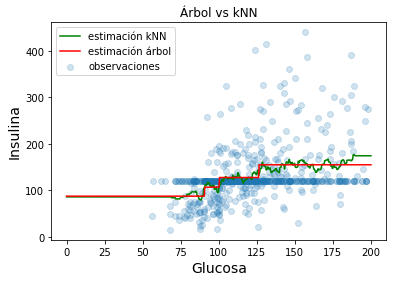

In [17]:
# Código a incluir para abordar la entrega de la celda anterior

#Representación gráfica de la función de regresión

T = np.linspace(0,200,600)[:, np.newaxis]
y_knn = modelo_knn_regres.predict(T) 
y_tree = Regresor_Arbol_1D.predict(T)

# Representamos las estimaciones sobre el subconjunto de diseño
plt.scatter(X_train.values.reshape(-1,1), y_train.values.reshape(-1,1), alpha=0.2, label='observaciones')
plt.plot(T, y_knn, c='g', label='estimación kNN')
plt.plot(T, y_tree, c='red', label='estimación árbol')
plt.xlabel('Glucosa',fontsize=14)  
plt.ylabel('Insulina',fontsize=14) 
plt.axis('tight')
plt.title("Árbol vs kNN")
plt.legend()
plt.show()

Ambos métodos predicen valores de Insulina muy parecidos, ya que en la gráfica se puede observar como ambas funciones tienen la misma tendencia.

El regresor kNN presenta más variaciones en los valores de salida. Sin embargo, el árbol de regresión tiene menos variación en los valores de salida. 

La función de regresión obtenida con el árbol es constante a tramos porque el árbol que se ha diseñado divide el espacio de la característica Glucosa en cuatro regiones. El valor de cada tramo corresponde a la media aritmética de las salidas de las observaciones contenidas en cada una de esas cuatro regiones.

- **Evalúe el regresor diseñado con el árbol sobre la partición de test. Obtenga los valores para las mismas figuras de mérito que en la sección anterior. Construya una tabla para comparar los resultados.**

In [18]:
# Código a incluir para abordar la entrega de la celda anterior

y_test_estimada = Regresor_Arbol_1D.predict(X_test.values.reshape(-1,1)) # evaluamos en test

ME_test_tree_1D = max_error(y_test.values.reshape(-1,1), y_test_estimada)
RMSE_test_tree_1D = mean_squared_error(y_test.values.reshape(-1,1), y_test_estimada, squared=False)
MAE_test_tree_1D = mean_absolute_error(y_test.values.reshape(-1,1), y_test_estimada)
MSE_test_tree_1D = mean_squared_error(y_test.values.reshape(-1,1), y_test_estimada)

Tabla1=pd.DataFrame({ "Prestaciones":["MSE","RMSE", 'MAE','ME'],
                      "Valor" : [MSE_test_tree_1D,RMSE_test_tree_1D,MAE_test_tree_1D,ME_test_tree_1D]})
Tabla1

,Prestaciones,Valor
0,MSE,3051.454593
1,RMSE,55.239973
2,MAE,40.010798
3,ME,219.966102


Se puede observar como el MSE es el valor más alto, esto se debe a que las unidades están elevadas al cuadrado $(mu U/ml)^2$. El siguiente valor más alto es el de ME, ya que este error calcula la peor de las estimaciones en las unidades de la característica de salida (Insulina). Por otro lado, las prestaciones RMSE y MAE son comparables porque presentan las mismas unidades de Insulina. Sin embargo, se observa que MAE obtiene un menor valor pues pondera los errores grandes en menor medida que el RMSE.

- **De las presentadas en los contenidos teóricos de la asignatura, ¿qué otras figuras de mérito, expresadas en las mismas unidades que la variable de salida, considera adecuado evaluar? Incluya el código y obtenga los valores correspondientes para la partición de test, incluyéndolos en la tabla anterior.**

    Otras figuras de mérito que están expresadas en las mismas unidades que la variable de salida son la raíz cuadrada del error cuadrático medio (RMSE) y el error máximo. Han sido calculadas en el apartado anterior para comentar las diferencias.

- **A la vista de los resultados, ¿qué regresor elegiría, el diseñado con k-nn o con árboles? Proporcione valores numéricos en la comparación.**

In [19]:
# Código a incluir para abordar la entrega de la celda anterior
Tabla2=pd.DataFrame({ "Prestaciones":["MSE","RMSE", 'MAE','ME'],
                      "Valores árbol" : [MSE_test_tree_1D,RMSE_test_tree_1D,MAE_test_tree_1D,ME_test_tree_1D],
                    "Valores kNN" : [MSE_test_knn_1D,RMSE_test_knn_1D,MAE_test_knn_1D,ME_test_knn_1D]})
Tabla2

,Prestaciones,Valores árbol,Valores kNN
0,MSE,3051.454593,2981.430952
1,RMSE,55.239973,54.602481
2,MAE,40.010798,39.472727
3,ME,219.966102,221.766667


A la vista de los resultados de la tabla el regresor diseñado con KNN es la mejor opción. Los valores de las prestaciones MSE, RMSE y MAE de KNN son ligeramente inferiores a los del regresor del árbol. Se puede observar que el ME es mayor en el KNN, pero esto no significa que sea peor rergesor ya que dicho valor corresponde a la peor estimación y no tiene en cuenta resto de las estimaciones.

# 4. Regresor k-nn con dos variables de entrada 

En esta sección diseñará otro modelo de regresión k-nn básico (sin ponderación con la distancia) considerando dos variables de entrada (glucosa e índice de masa corporal). Seleccionaremos el modelo según MSE sobre un conjunto de validación y comparará las prestaciones con los diseños anteriores. 

El modelo sobre el que evaluar las prestaciones del conjunto de test se seleccionará conforme al mínimo valor de MSE en validación (3-fold cross validation).



## Entrega

- **Realice una representación gráfica del histograma de cada característica. Etiquete adecuadamente los ejes.**

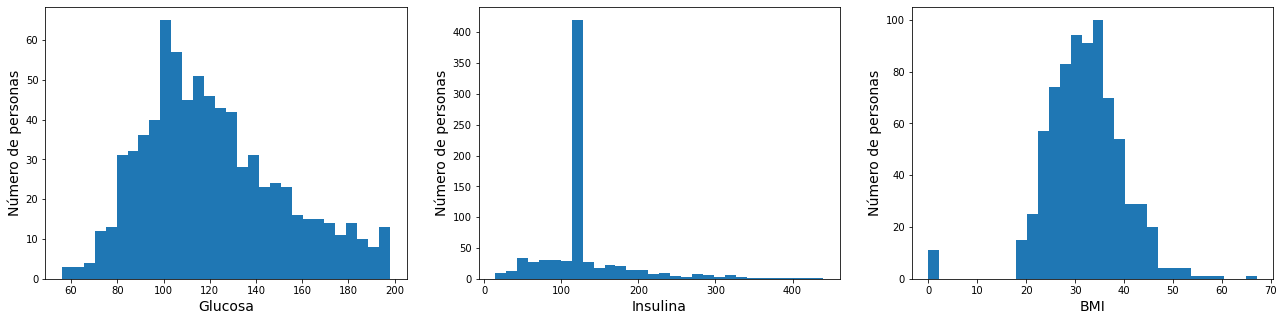

In [20]:
# Código a incluir para abordar la entrega de la celda anterior

# Representaciones gráficas

plt.figure(figsize=(22,5))

# Glucosa
plt.subplot(1,3,1)
plt.hist(glucosa,bins=30)
plt.xlabel('Glucosa',fontsize=14)
plt.ylabel('Número de personas',fontsize=14)

# Insulina
plt.subplot(1,3,2)
plt.hist(insulina,bins=30)
plt.xlabel('Insulina',fontsize=14)
plt.ylabel('Número de personas',fontsize=14)

# BMI
plt.subplot(1,3,3)
plt.hist(BMI,bins=30)
plt.xlabel('BMI',fontsize=14)
plt.ylabel('Número de personas',fontsize=14) 


plt.show()

- **Realice tres scatter plots: glucosa-insulina, BMI-insulina, glucosa-BMI. Etiquete adecuadamente los ejes.**

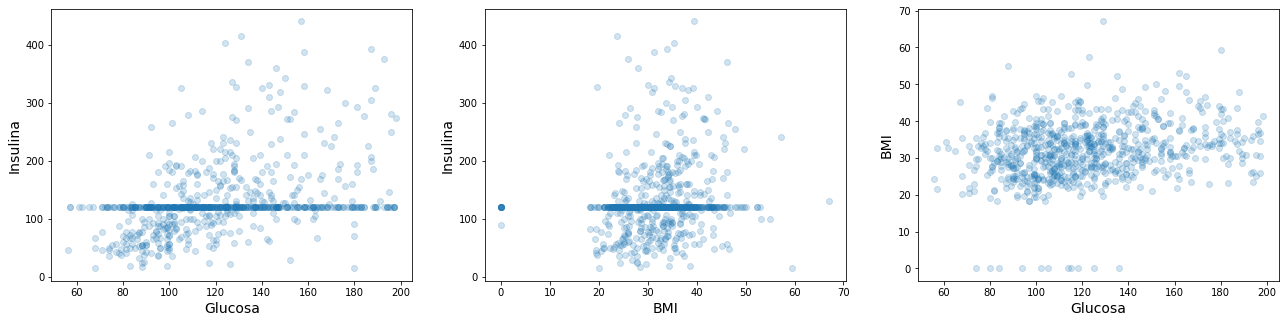

In [21]:
# Código a incluir para abordar la entrega de la celda anterior

plt.figure(figsize=(22,5))

# Glucosa vs Insulina
plt.subplot(1,3,1)
plt.scatter(glucosa,insulina,alpha=0.2)
plt.xlabel('Glucosa',fontsize=14)  
plt.ylabel('Insulina',fontsize=14)

# BMI vs Insulina
plt.subplot(1,3,2)
plt.scatter(BMI,insulina,alpha=0.2)
plt.xlabel('BMI',fontsize=14)  
plt.ylabel('Insulina',fontsize=14)

# Glucosa vs BMI
plt.subplot(1,3,3)
plt.scatter(glucosa,BMI,alpha=0.2)
plt.xlabel('Glucosa',fontsize=14)  
plt.ylabel('BMI',fontsize=14)

plt.show()

- **¿Qué representan los valores nulos en el BMI?**

    Los valores nulos de BMI se corresponden a valores perdidos, los ceros que se pueden observar en el scatter plot, ya que no cobran sentido en esta característica.


- **Explique qué podría hacer para no disponer de valores nulos en la variable BMI sin reducir el número de ejemplos. Haga uso de alguna de las técnicas de regresión no paramétricas presentadas en esta práctica para implementar un modelo de imputación del BMI que sólo tenga en cuenta como entrada las 2 características indicadas previamente (glucosa, insulina).**

     Para no disponer de valores nulos, se crea un modelo que predice los valores de la variable BMI (variable de salida) por medio de Insulina y Glucosa como variables de entrada al regresor. Para ello, se crea un subconjunto de diseño formado por las observaciones en las que la variable BMI no presenta un valor nulo. Por otro lado, se crea un subconjunto de test formado por las observaciones de las que se desea obtener el valor de BMI predicho (observaciones con valores nulos en la variable BMI).
     
     Posteriormente, el subconjunto de entrenamiento se divide en X_train, características de entrada al regresor e y_train, etiquetas asociadas a dichas características (BMI). El subconjunto de test se divide en X_test, características a partir de las cuales se realiza la predicción e y_test, valores a predecir.
     
     Una vez creados todos los subconjuntos, se crea el modelo no parámetrico a partir del subconjunto de diseño, donde, por medio de cross validation se elegirá o elegirán los diferentes hiperparámetros más adecuados. Tras diseñar el modelo se predicen los valores de BMI con valores nulos (subconjunto de test) y se sustituyen en los valores nulos de BMI de la base de datos.

In [22]:
#Implementación imputacion bmi por knn                                                                       
BMI_test = pd.DataFrame(columns=pima_indians_df.columns)
BMI_train = pd.DataFrame(columns=pima_indians_df.columns)

In [23]:
i=0
j=0
for index,value in enumerate (pima_indians_df['BMI']):
    if value == 0:  
        BMI_test.loc[i] = pima_indians_df.iloc[index]
        i=i+1
    else:
        BMI_train.loc[j] = pima_indians_df.iloc[index]
        j=j+1

In [24]:
BMI_test.shape

(11, 9)

In [25]:
BMI_train.shape

(757, 9)

In [26]:
from sklearn.preprocessing import StandardScaler

X_train = BMI_train[["Insulin","Glucose"]]
y_train = BMI_train["BMI"]
X_test = BMI_test[["Insulin","Glucose"]]
y_test = BMI_test["BMI"]

scaler = StandardScaler().fit(X_train)
X_train_norm = scaler.transform(X_train)
X_test_norm  = scaler.transform(X_test)

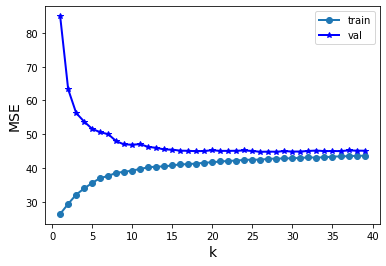

Menor MSE en validación: 44.807
Mejor valor del hiperparámetro: {'n_neighbors': 26}


In [27]:
# 2. Selección del hiper-parámetro haciendo uso del conjunto de diseño. El criterio de elección es mínimo MSE

param_grid = {'n_neighbors': range(1,40)}
k_grid = np.array(range(1,40))
grid_knn = GridSearchCV(KNeighborsRegressor(), param_grid = param_grid, scoring = 'neg_mean_squared_error', cv=3, return_train_score=True)
grid_knn.fit(X_train_norm, y_train)

mse_train = -1*np.array(grid_knn.cv_results_['mean_train_score'])
mse_val = -1*np.array(grid_knn.cv_results_['mean_test_score'])


plt.plot(k_grid,mse_train,'-o',label="train", linewidth=2)
plt.plot(k_grid,mse_val,'-*b',label="val", linewidth=2)
plt.xlabel('k',fontsize=14)
plt.ylabel('MSE',fontsize=14)
plt.legend()
plt.show()

print("Menor MSE en validación: {:.3f}".format(-grid_knn.best_score_))
print("Mejor valor del hiperparámetro: {}".format(grid_knn.best_params_))



El valor más adecuado de k vecinos determinado por cross validation es 26. Sin embargo, visualizando la gráfica apenas hay cambio en el MSE a partir de, aproximadamente, 16 vecinos más próximos. Es por ello, que para diseñar el modelo kNN se elige un valor de k=16.

In [28]:
# Con el valor de k seleccionado, construimos el modelo con el conjunto de diseño y evaluamos las prestaciones en test
n_neighbors = 16
modelo_knn_regres = KNeighborsRegressor(n_neighbors) 
y_test_estimada = modelo_knn_regres.fit(X_train_norm, y_train).predict(X_test_norm) # Entrenamos y evaluamos en test

y_test_estimada

array([30.90625, 29.43125, 30.83125, 28.9625 , 33.5375 , 32.89375,
       29.7625 , 30.00625, 30.03125, 32.8875 , 30.20625])

In [29]:
i=0
for index,value in enumerate (pima_indians_df['BMI']):
    if value == 0:
        pima_indians_df.drop(index)
        pima_indians_df.loc[index]=y_test_estimada[i]
        i=i+1

In [30]:
#Se imputan también los outliers para obtener mejores resultados en el diseño de los modelos
for i in pima_indians_df[["BMI"]]:
    pima_indians_df[[i]]=pima_indians_df[[i]].replace(outliers(i),np.nan)

In [31]:
pima_indians_df.fillna(pima_indians_df.median(), inplace=True) 

In [32]:
BMI = pima_indians_df.iloc[:, 5]

- **Explique y justifique razonadamente si es conveniente (o no) realizar la normalización de las características.**

    En kNN es conveniente realizar la normalización de las dos variables de entrada (Glucosa y BMI). Esto se debe a que el cálculo de las distancias euclídeas a cada vecino se va a ver influida por el rango dinámico de cada una de las características. Si no se normaliza y tienen distintos rangos, una característica predominaría sobre la otra, obteniendo una falsa realidad de los vecinos próximos.

## Entrega
- **Diseñe un regresor k-nn para estimar la variable insulina a partir de las variables de glucosa e índice de masa corporal. Identifique el mejor valor del parámetro k**

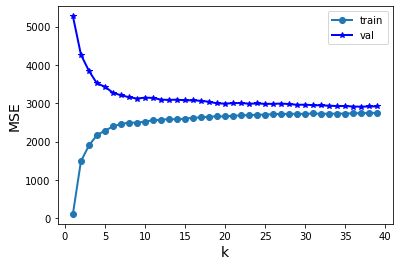

Menor MSE en validación: 2912.216
Mejor valor del hiperparámetro: {'n_neighbors': 37}


In [33]:
# Código a incluir para abordar la entrega de la celda anterior

from sklearn.preprocessing import StandardScaler

X_all = pima_indians_df[['Glucose', 'BMI']]    # Valores preprocesados
Y_all = pima_indians_df['Insulin']             # Valores preprocesados

X_train, X_test, y_train, y_test = train_test_split(X_all, Y_all, test_size = 0.2, random_state=2)

scaler = StandardScaler().fit(X_train)
X_train_norm = scaler.transform(X_train)
X_test_norm  = scaler.transform(X_test)

param_grid = {'n_neighbors': range(1,40)}
k_grid = np.array(range(1,40))
grid_knn = GridSearchCV(KNeighborsRegressor(), param_grid = param_grid, scoring = 'neg_mean_squared_error', cv=3, return_train_score=True)
grid_knn.fit(X_train_norm, y_train)

mse_train = -1*np.array(grid_knn.cv_results_['mean_train_score'])
mse_val = -1*np.array(grid_knn.cv_results_['mean_test_score'])

plt.plot(k_grid,mse_train,'-o',label="train", linewidth=2)
plt.plot(k_grid,mse_val,'-*b',label="val", linewidth=2)
plt.xlabel('k',fontsize=14)
plt.ylabel('MSE',fontsize=14)
plt.legend()
plt.show()

print("Menor MSE en validación: {:.3f}".format(-grid_knn.best_score_))
print("Mejor valor del hiperparámetro: {}".format(grid_knn.best_params_))


El valor más adecuado de k vecinos determinado por cross validation es 37. Sin embargo, visualizando la gráfica apenas hay cambio en el MSE a partir de, aproximadamente, 20 vecinos más próximos. Es por ello, que para diseñar el modelo kNN se elige un valor de k=20.

- **Obtenga los valores asociados a las mismas figuras de mérito que en apartados anteriores y compare prestaciones**

In [34]:
# Código a incluir para abordar la entrega de la celda anterior

# Con el valor de k seleccionado, construimos el modelo con el conjunto de diseño y evaluamos las prestaciones en test
n_neighbors = 20

modelo_knn_regres = KNeighborsRegressor(n_neighbors) 
y_test_estimada = modelo_knn_regres.fit(X_train_norm, y_train).predict(X_test_norm) # Entrenamos y evaluamos en test

MAE_test_knn_2D = mean_absolute_error(y_test, y_test_estimada)
MSE_test_knn_2D = mean_squared_error(y_test, y_test_estimada)
ME_test_knn_2D = max_error(y_test, y_test_estimada)
RMSE_test_knn_2D = mean_squared_error(y_test, y_test_estimada, squared = False)

Tabla3 = pd.DataFrame({ "Prestaciones":["MSE","RMSE", 'MAE','ME'],
                    "Valores kNN 2D" : [MSE_test_knn_2D,RMSE_test_knn_2D,MAE_test_knn_2D,ME_test_knn_2D]})
Tabla3

,Prestaciones,Valores kNN 2D
0,MSE,3137.386173
1,RMSE,56.012375
2,MAE,39.940526
3,ME,233.150000


Se puede observar como el MSE es el valor más alto, esto se debe a que las unidades están elevadas al cuadrado $(𝑚𝑢𝑈/𝑚𝑙)^2$. El siguiente valor más alto es el de ME, ya que este error calcula la peor de las estimaciones en las unidades de la característica de salida (Insulina). Por otro lado, las prestaciones RMSE y MAE son comparables porque presentan las mismas unidades de Insulina. Sin embargo, se observa que MAE obtiene un menor valor pues pondera los errores grandes en menor medida que el RMSE.

En comparación con las prestaciones obtenidas en kNN 1D, éstas aumentan generando peores resultados. Por lo que, añadir como variable de entrada al modelo BMI, no es una buena opción.

# 5. Árboles de regresión con dos variables de entrada

En esta sección se diseñará otro modelo de árbol de regresión considerando dos variables de entrada (glucosa e índice de masa corporal). Seleccionaremos el modelo según MSE sobre un conjunto de validación (3-fold cross validation),  compararando las prestaciones con los diseños anteriores. 





## Entrega


- **Explique y justifique razonadamente si es conveniente (o no) realizar la normalización de las características.**
    
    En el árbol de regresión, no es necesario normalizar aunque tengamos dos características de entrada, porque cada partición del árbol se realiza teniendo en cuenta una sola variable. Por otro lado, en la característica de salida tampoco es necesaria ya que todas las salidas estimadas se encontrarán en la misma magnitud; en nuestro caso mu U/ml.

- **Diseñe un árbol de regresión para estimar la variable insulina a partir de las variables de glucosa e índice de masa corporal. Identifique el mejor valor para la profundidad del árbol.**

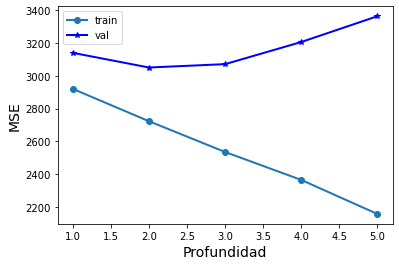

Menor MSE en validación cruzada: 3050.746
Mejor valor del hiperparámetro: {'max_depth': 2}


In [35]:
# Código a incluir para abordar la entrega de la celda anterior

from sklearn.tree import DecisionTreeRegressor

# Selección de hiper-parámetros del árbol. En principio, consideraremos sólo la profundidad máxima
param_grid = {'max_depth': range(1,6)}
profundidad_grid = np.array(range(1,6))

grid_arbol = GridSearchCV(DecisionTreeRegressor(random_state=0), param_grid = param_grid, scoring = 'neg_mean_squared_error', cv=3, return_train_score=True)
grid_arbol.fit(X_train, y_train)

mse_train_arbol = -1*np.array(grid_arbol.cv_results_['mean_train_score'])
mse_val_arbol = -1*np.array(grid_arbol.cv_results_['mean_test_score'])

plt.plot(profundidad_grid,mse_train_arbol,'-o',label="train", linewidth=2)
plt.plot(profundidad_grid,mse_val_arbol,'-*b',label="val", linewidth=2)
plt.xlabel('Profundidad',fontsize=14)
plt.ylabel('MSE',fontsize=14)
plt.legend()
plt.show()

print("Menor MSE en validación cruzada: {:.3f}".format(-grid_arbol.best_score_))
print("Mejor valor del hiperparámetro: {}".format(grid_arbol.best_params_))


In [36]:
# Código a incluir para abordar la entrega de la celda anterior

# Con el valor de máxima profundidad seleccionado, construimos el modelo con el conjunto de diseño y evaluamos las prestaciones en test
from sklearn.tree import export_graphviz
from pydotplus import graph_from_dot_data

# Construyo el modelo con los ejemplos de train 
param_max_depth=2
Regresor_Arbol_2D = DecisionTreeRegressor(max_depth=param_max_depth)
Regresor_Arbol_2D.fit(X_train, y_train)

# Represento visualmente el árbol
Nombres_Caract_In = ['Glucose','BMI']

dot_data_1 = export_graphviz(Regresor_Arbol_2D,
                           feature_names=Nombres_Caract_In)

graph = graph_from_dot_data(dot_data_1)
graph.write_png('Tree_Glucosa_BMI.png')

True

<img src="Tree_Glucosa_BMI.png">

El árbol de regresión que se ha contruido ofrece cuatro valores distintos: 32.156, 96.699, 128.073, 155.034. Dichos valores se han obtenido mediante la media aritmética de las salidas de las observaciones contenidas en cada una de las regiones definidas por las particiones de los nodos. 

Con respecto al árbol obtenido con una variable de entrada en el apartado anterior, éste obtiene salidas distintas aun teniendo la misma profundidad en ambos árboles (2) y utilizando la misma variable (Glucosa) para realizar las particiones pero diferente punto de corte (condición).

- **Obtenga los valores asociados a las mismas figuras de mérito que en apartados anteriores y compare prestaciones.**

In [37]:
# Código a incluir para abordar la entrega de la celda anterior

y_test_estimada = Regresor_Arbol_2D.predict(X_test) # evaluamos en test

ME_test_tree_2D = max_error(y_test, y_test_estimada)
RMSE_test_tree_2D = mean_squared_error(y_test, y_test_estimada, squared=False)
MAE_test_tree_2D = mean_absolute_error(y_test, y_test_estimada)
MSE_test_tree_2D = mean_squared_error(y_test, y_test_estimada)


Tabla3 = pd.DataFrame({ "Prestaciones":["MSE","RMSE", 'MAE','ME'],
                      "Valores árbol 2D" : [MSE_test_tree_2D,RMSE_test_tree_2D,MAE_test_tree_2D,ME_test_tree_2D]})
Tabla3

,Prestaciones,Valores árbol 2D
0,MSE,3048.339171
1,RMSE,55.211767
2,MAE,39.519716
3,ME,219.966102


El comportamiento es ligeramente distinto al de un árbol con una única variable de entrada.

Se puede observar como el MSE es el valor más alto, esto se debe a que las unidades están elevadas al cuadrado  $(𝑚𝑢𝑈/𝑚𝑙)^2$. El siguiente valor más alto es el de ME, ya que este error calcula la peor de las estimaciones en las unidades de la característica de salida (Insulina). Por otro lado, las prestaciones RMSE y MAE son comparables porque presentan las mismas unidades de Insulina. Sin embargo, se observa que MAE obtiene un menor valor pues pondera los errores grandes en menor medida que el RMSE.

# 6. Regresor basado en el Perceptrón MultiCapa (2 variables de entrada)  

En esta sección se considera el diseño de un regresor a partir de un MLP con una única capa oculta y funciones de activación de tipo tangente hiperbólica. Las variables de entrada serán glucosa e índice de masa corporal.

Únicamente se explorará como hiperparámetro el número de neuronas ocultas de la capa oculta.


## Entrega


- **Justifique razonadamente la conveniencia de realizar la normalización de las características de entrada a la red. Discuta sobre la idoneidad de la normalización de la característica de salida.**

    Es conveniente realizar la normalización de las características de entrada ya que un MLP se basa en una combinación lineal de las variables de entrada multiplicadas por unos pesos, seguido de una función no lineal caracaterizada como función de activación. Si las variables de entrada tuvieran rangos dinámicos diferentes, los pesos asignados no serían los adecuados, pudiendo predominar variables (peso mayor) cuando en realidad no son las que mejor definen la salida. 
    
    Por otro lado, podría ser conveniente la normalización de la característica de salida dependiendo de la función de activación elegida. Si por ejemplo, se utilizara la función de activación tangente hiperbólica habría que normalizar la salida en un rango de (-1,1) para poder obtener correctamente la actualización de los pesos.

- **Diseñe un MLP con una única capa oculta para estimar la variable insulina a partir de las variables de glucosa e índice de masa corporal. Identifique el mejor valor para el número de neuronas de la capa oculta (hiperparámetro del MLP).**




### Normalizando solo las entradas

In [38]:
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import MinMaxScaler

X_all = pima_indians_df[['Glucose', 'BMI']] #Valores preprocesados
Y_all = pima_indians_df['Insulin']

# Selección del modelo
X_train, X_test, y_train, y_test = train_test_split(X_all, Y_all, test_size = 0.2, random_state=2)


# Normalización, de tipo estandarización, para cada variable

scaler = StandardScaler().fit(X_train)
X_train_norm = scaler.transform(X_train)
X_test_norm  = scaler.transform(X_test)

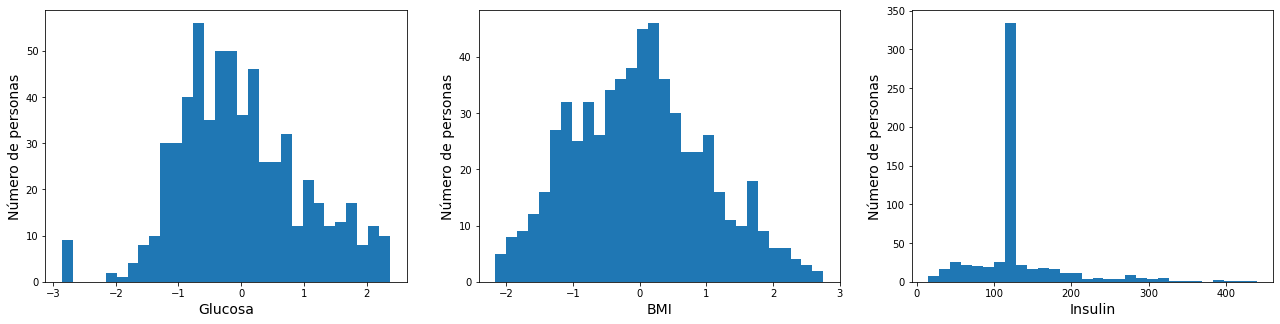

In [39]:
# Visualizamos las variables de train de las particiones que vamos a meter al modelo
plt.figure(figsize=(22,5))

# Glucosa
plt.subplot(1,3,1)
plt.hist(X_train_norm[:,0],bins=30)
plt.xlabel('Glucosa',fontsize=14)
plt.ylabel('Número de personas',fontsize=14)

# Insulina
plt.subplot(1,3,2)
plt.hist(X_train_norm[:,1],bins=30)
plt.xlabel('BMI',fontsize=14)
plt.ylabel('Número de personas',fontsize=14)

# BMI
plt.subplot(1,3,3)
plt.hist(y_train,bins=30)
plt.xlabel('Insulin',fontsize=14)
plt.ylabel('Número de personas',fontsize=14) 

plt.show()

Observando los histogramas del conjunto de train que vamos a utilizar para diseñar el modelo MLP, se percibe que va a haber un problema con el entrenamiento de éste. Al haber imputado la gran cantidad de los missing values de Insulina directamente por la mediana, el modelo va a aprender que éste es el valor más alto pues es el que más aparece con diferencia, dando lugar a una posible saturación en la función de activación.

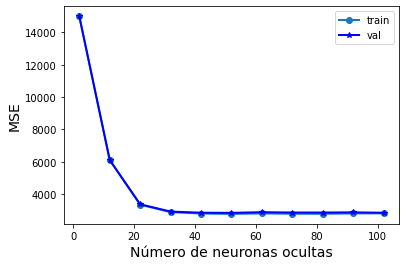

Menor MSE en validación: 2838.589
Mejor valor del hiperparámetro: {'hidden_layer_sizes': 52}


In [40]:
# Configuración del MLP
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

param_grid = {'hidden_layer_sizes': range(2,108,10)}
neuronas_ocultas_grid = np.array(range(2,108,10))

grid_MLP = GridSearchCV(MLPRegressor(max_iter = 2000, random_state=0, activation='tanh'), param_grid = param_grid, scoring = 'neg_mean_squared_error', cv=3, return_train_score=True)
grid_MLP.fit(X_train_norm, y_train)


mse_MLP_train = -1*np.array(grid_MLP.cv_results_['mean_train_score'])
mse_MLP_val = -1*np.array(grid_MLP.cv_results_['mean_test_score'])


plt.plot(neuronas_ocultas_grid,mse_MLP_train,'-o',label="train", linewidth=2)
plt.plot(neuronas_ocultas_grid,mse_MLP_val,'-*b',label="val", linewidth=2)
plt.xlabel('Número de neuronas ocultas',fontsize=14)
plt.ylabel('MSE',fontsize=14)
plt.legend()
plt.show()

print("Menor MSE en validación: {:.3f}".format(-grid_MLP.best_score_))
print("Mejor valor del hiperparámetro: {}".format(grid_MLP.best_params_))

El valor más adecuado de neuronas en la capa oculta determinado por cross validation es 52. Sin embargo, visualizando la gráfica apenas hay cambio en el MSE a partir de, aproximadamente, 30 neuronas. Es por ello, que para diseñar el modelo MLP se elige un valor de neuronas=30.

Se observa en la gráfica que las curvas de validación y entrenamiento están solapadas, lo cual no es un resultado esperado y se puede llegar a pensar que el modelo está teniendo un problema de saturación por diversos factores.

Se visualizan los histogramas de la salida deseada y la salida predicha por el modelo que se acaba de diseñar para comprobar la existencia del problema de saturación.

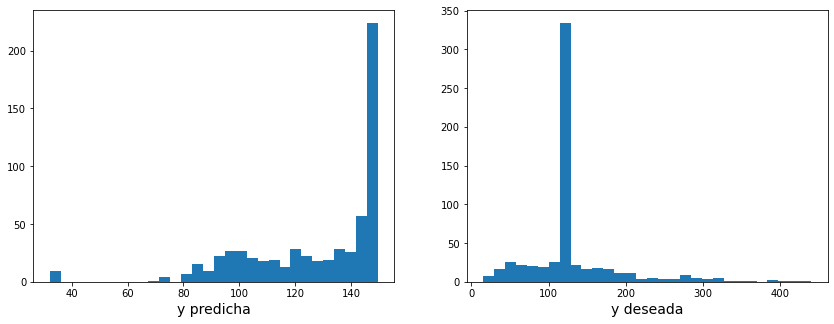

In [41]:
MLP=MLPRegressor(max_iter = 2000, random_state=0, activation='tanh',hidden_layer_sizes=30)
y_predict=MLP.fit(X_train_norm,y_train).predict(X_train_norm)

plt.figure(figsize=(22,5))
plt.subplot(1,3,1)
plt.hist(y_predict,bins=30)
plt.xlabel('y predicha',fontsize=14)

plt.subplot(1,3,2)
plt.hist(y_train,bins=30)
plt.xlabel('y deseada',fontsize=14)
plt.show()

Como se ha comentado anteriormente, claramente está habiendo un problema de saturación debido a la imputación realizada. Otra posible causa de este problema puede ser la inicialización de los pesos que provocan una temprana saturación de las neuronas. Esta saturación se puede observar en el histograma al ver que la predicción del modelo se realiza en mayor medida en valores de 150 aproximadamente.

Esto es debido a que, en el momento en el que en el aprendizaje pasan todas las muestras siendo la mayoría de éstas el mismo valor, está provocando una saturación en la red ya que las derivadas parciales llegan a cero, parando el aprendizaje. Por tanto, unas posibles soluciones a este problema son cambiar el algoritmo de inicializacion de los pesos, el momento, la función de activación, el tipo de learning rate, entre otros.

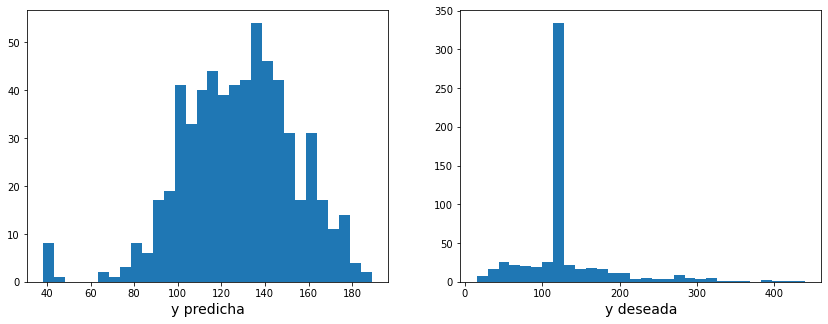

In [42]:
MLP=MLPRegressor(max_iter = 4000, random_state=0, activation='relu',solver='sgd',learning_rate='adaptive', hidden_layer_sizes=(30,), batch_size=150)
y_predict=MLP.fit(X_train_norm,y_train).predict(X_train_norm)

plt.figure(figsize=(22,5))
plt.subplot(1,3,1)
plt.hist(y_predict,bins=30)
plt.xlabel('y predicha',fontsize=14)

plt.subplot(1,3,2)
plt.hist(y_train,bins=30)
plt.xlabel('y deseada',fontsize=14)
plt.show()

Modificando los parámetros del modelo se ha conseguido parar la saturación y además, conseguir un rango mayor en los valores de la salida predicha. Sin embargo, sigue habiendo valores de salida que no se aprenden. El siguiente paso sería modificar la inicialización de los pesos del modelo. No obstante, este parámetro no se encuentra en Sklearn.

Con estos parámetros elegidos, se calcula mediante cross validation el valor mas adecuado de las neuronas en la capa oculta:

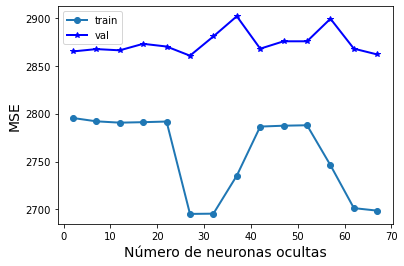

Menor MSE en validación: 2860.456
Mejor valor del hiperparámetro: {'hidden_layer_sizes': 27}


In [43]:
# Configuración del MLP
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

param_grid = {'hidden_layer_sizes': range(2,70,5)}
neuronas_ocultas_grid = np.array(range(2,70,5))

grid_MLP = GridSearchCV(MLPRegressor(max_iter = 4000, random_state=0, activation='relu', batch_size=150, solver='sgd',learning_rate='adaptive'), param_grid = param_grid, scoring = 'neg_mean_squared_error', cv=3, return_train_score=True)
grid_MLP.fit(X_train_norm, y_train)


mse_MLP_train = -1*np.array(grid_MLP.cv_results_['mean_train_score'])
mse_MLP_val = -1*np.array(grid_MLP.cv_results_['mean_test_score'])


plt.plot(neuronas_ocultas_grid,mse_MLP_train,'-o',label="train", linewidth=2)
plt.plot(neuronas_ocultas_grid,mse_MLP_val,'-*b',label="val", linewidth=2)
plt.xlabel('Número de neuronas ocultas',fontsize=14)
plt.ylabel('MSE',fontsize=14)
plt.legend()
plt.show()

print("Menor MSE en validación: {:.3f}".format(-grid_MLP.best_score_))
print("Mejor valor del hiperparámetro: {}".format(grid_MLP.best_params_))

### Normalizacion salidas

In [44]:
#Probamos normalizando las salidas
scaler = MinMaxScaler(feature_range=(-1,1)).fit(y_train.values.reshape(-1, 1))

y_train_norm=scaler.transform(y_train.values.reshape(-1, 1))
y_test_norm=scaler.transform(y_test.values.reshape(-1, 1))

y_train_desnorm=scaler.inverse_transform(y_train_norm)
y_test_desnorm=scaler.inverse_transform(y_test_norm)

Se ha elegido una normalización min max entre -1,1 porque se va a elegir como función de activación en la capa oculta la tangente hiperbólica. De esta forma, en la actualización de los pesos mediante backpropagation que depende de la salida real menos la deseada, la diferencia de estas dos salidas será más pequeña, consiguiendo controlar mejor la red y evitando la temprana saturación (como se ha visto al inicio del apartado).

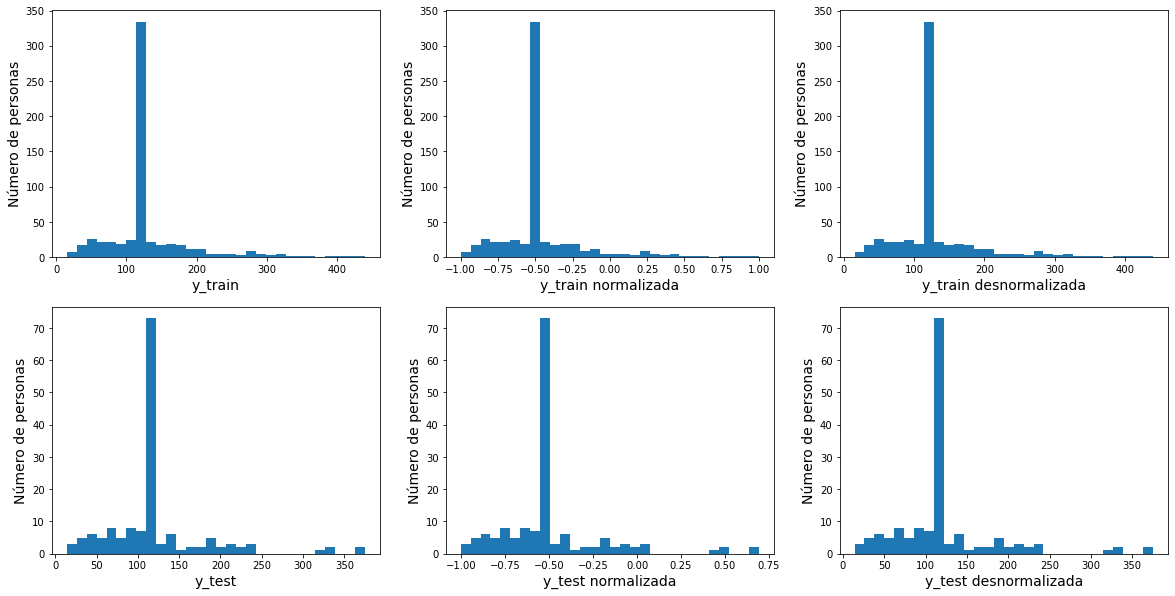

In [45]:
#Comprobacion de la desnormalizacion
plt.figure(figsize=(20,10))

#train
plt.subplot(2,3,1)
plt.hist(y_train,bins=30)
plt.xlabel('y_train',fontsize=14)
plt.ylabel('Número de personas',fontsize=14)

plt.subplot(2,3,2)
plt.hist(y_train_norm,bins=30)
plt.xlabel('y_train normalizada',fontsize=14)
plt.ylabel('Número de personas',fontsize=14)

plt.subplot(2,3,3)
plt.hist(y_train_desnorm,bins=30)
plt.xlabel('y_train desnormalizada',fontsize=14)
plt.ylabel('Número de personas',fontsize=14) 

#test
plt.subplot(2,3,4)
plt.hist(y_test,bins=30)
plt.xlabel('y_test',fontsize=14)
plt.ylabel('Número de personas',fontsize=14)

plt.subplot(2,3,5)
plt.hist(y_test_norm,bins=30)
plt.xlabel('y_test normalizada',fontsize=14)
plt.ylabel('Número de personas',fontsize=14)

plt.subplot(2,3,6)
plt.hist(y_test_desnorm,bins=30)
plt.xlabel('y_test desnormalizada',fontsize=14)
plt.ylabel('Número de personas',fontsize=14) 

plt.show()

Como se puede observar la función para desnormalizar las variables de salida funciona correctamente. Por tanto, cuando se desnormalicen las salidas predichas en test se van a poder comparar las prestaciones de este modelo con el resto de la práctica.

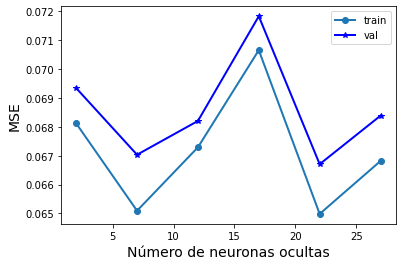

Menor MSE en validación: 0.067
Mejor valor del hiperparámetro: {'hidden_layer_sizes': 22}


In [46]:
# Configuración del MLP
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

param_grid = {'hidden_layer_sizes': range(2,30,5)}
neuronas_ocultas_grid = np.array(range(2,30,5))

grid_MLP = GridSearchCV(MLPRegressor(max_iter = 10000, random_state=0, activation='tanh'), param_grid = param_grid, scoring = 'neg_mean_squared_error', cv=3, return_train_score=True)
grid_MLP.fit(X_train_norm, y_train_norm)

mse_MLP_train = -1*np.array(grid_MLP.cv_results_['mean_train_score'])
mse_MLP_val = -1*np.array(grid_MLP.cv_results_['mean_test_score'])

plt.plot(neuronas_ocultas_grid,mse_MLP_train,'-o',label="train", linewidth=2)
plt.plot(neuronas_ocultas_grid,mse_MLP_val,'-*b',label="val", linewidth=2)
plt.xlabel('Número de neuronas ocultas',fontsize=14)
plt.ylabel('MSE',fontsize=14)
plt.legend()
plt.show()

print("Menor MSE en validación: {:.3f}".format(-grid_MLP.best_score_))
print("Mejor valor del hiperparámetro: {}".format(grid_MLP.best_params_))

El valor más adecuado de neuronas en la capa oculta determinado por cross validation es 22. Sin embargo, visualizando la gráfica el MSE en, aproximadamente, 7 neuronas es prácticamente el mismo. Es por ello, que para diseñar el modelo MLP se elige un valor de neuronas=7.

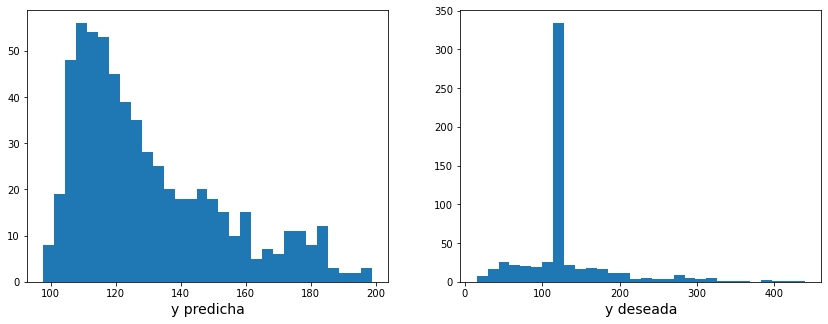

In [47]:
MLP=MLPRegressor(max_iter = 10000, random_state=0, activation='tanh',hidden_layer_sizes=(7,))
y_predict=MLP.fit(X_train_norm,y_train_norm).predict(X_train_norm)
y_predict=scaler.inverse_transform(y_predict.reshape(-1,1))

plt.figure(figsize=(22,5))
plt.subplot(1,3,1)
plt.hist(y_predict,bins=30)
plt.xlabel('y predicha',fontsize=14)

plt.subplot(1,3,2)
plt.hist(y_train,bins=30)
plt.xlabel('y deseada',fontsize=14)
plt.show()

Se puede observar que se ha conseguido evitar el problema de saturación que aparecía en el MLP sin normalizar la variable de salida utilizando la tangente hiperbólica como función de activación.  

- **Teniendo en cuenta la arquitectura del MLP seleccionado, indique cuántos parámetros sería necesario aprender en la red. Teniendo en cuenta que, en general suelen ser necesarios 10 ejemplos de aprendizaje para aprender cada parámetro, ¿cree que dispone de suficientes ejemplos para estimar adecuadamente esos parámetros?**

Teniendo en cuenta la arquitectura del MLP se obtienen los siguientes parámetros para aprender en la red:
    
En MLP con función de activación tangente hiperbólica y salidas normalizadas:
- Nº parámetros = número de neuronas en la capa oculta x número de variables de entrda +  1 (bias) x número de neuronas en la capa oculta + número de neuronas en la capa oculta x número de salidas + 1 (bias) x número de salidas = 7 x 2 + 1 x 7 + 7 x 1 +  1 x 1 = 29 
    
En MLP con función de activación ReLu:
- Nº parámetros = número de neuronas en la capa oculta x número de variables de entrda +  1 (bias) x número de neuronas en la capa oculta + número de neuronas en la capa oculta x número de salidas + 1 (bias) x número de salidas = 27 x 2 + 1 x 27 + 27 x 1 + 1 x 1 = 109 
        
Si para aprender adecuadamente cada parámetro son necesarios 10 observaciones y la base de datos cuenta con 614 ejemplos de entrenamiento, en el modelo MLP con función de activación ReLu no tiene suficientes observaciones para estimar adecuadamente esos parámetros. Sin embargo, en el modelo MLP con función de activación tangente hiperbólica y con las salidas normalizadas sí se dispone de suficientes ejemplos para estimar adecuadamente esos parámetros.


- **Obtenga los valores asociados a las mismas figuras de mérito que en apartados anteriores. Compare prestaciones.**


In [50]:
# Código a incluir para abordar la entrega de la celda anterior

modelo_MLP_regres = MLPRegressor(max_iter = 4000, random_state=0, activation='relu', batch_size=150, solver='sgd',learning_rate='adaptive', hidden_layer_sizes=(27,)) 
y_test_estimada = modelo_MLP_regres.fit(X_train_norm, y_train).predict(X_test_norm) # Entrenamos y evaluamos en test

MAE_test_MLP_2D = mean_absolute_error(y_test, y_test_estimada)
MSE_test_MLP_2D = mean_squared_error(y_test, y_test_estimada)
ME_test_MLP_2D = max_error(y_test, y_test_estimada)
RMSE_test_MLP_2D = mean_squared_error(y_test, y_test_estimada, squared = False)


Tabla4 = pd.DataFrame({ "Prestaciones":["MSE","RMSE", 'MAE','ME'],
                      "Valores MLP 2D" : [MSE_test_MLP_2D,RMSE_test_MLP_2D,MAE_test_MLP_2D,ME_test_MLP_2D]})
Tabla4

,Prestaciones,Valores MLP 2D
0,MSE,3030.901331
1,RMSE,55.053622
2,MAE,39.215939
3,ME,213.324882


In [51]:
# NORMLAIZADA SALIDA

modelo_MLP_regres = MLPRegressor(max_iter = 10000, random_state=0, activation='tanh', hidden_layer_sizes=(27,)) 
y_test_estimada = modelo_MLP_regres.fit(X_train_norm, y_train_norm).predict(X_test_norm) # Entrenamos y evaluamos en test
y_test_estimada=scaler.inverse_transform(y_test_estimada.reshape(-1,1))

MAE_test_MLP_2D_norm = mean_absolute_error(y_test, y_test_estimada)
MSE_test_MLP_2D_norm = mean_squared_error(y_test, y_test_estimada)
ME_test_MLP_2D_norm = max_error(y_test, y_test_estimada)
RMSE_test_MLP_2D_norm = mean_squared_error(y_test, y_test_estimada, squared = False)

Tabla4 = pd.DataFrame({ "Prestaciones":["MSE","RMSE", 'MAE','ME'],
                      "Valores MLP 2D" : [MSE_test_MLP_2D_norm,RMSE_test_MLP_2D_norm,MAE_test_MLP_2D_norm,ME_test_MLP_2D_norm]})
Tabla4

,Prestaciones,Valores MLP 2D
0,MSE,3186.410156
1,RMSE,56.448296
2,MAE,41.589390
3,ME,198.984799


Se obtienen mejores prestaciones con el modelo MLP diseñado con una función de activación ReLu.

En ambos se puede observar como el MSE es el valor más alto, esto se debe a que las unidades están elevadas al cuadrado  $(𝑚𝑢𝑈/𝑚𝑙)^2$. El siguiente valor más alto es el de ME, ya que este error calcula la peor de las estimaciones en las unidades de la característica de salida (Insulina). Por otro lado, las prestaciones RMSE y MAE son comparables porque presentan las mismas unidades de Insulina. Sin embargo, se observa que MAE obtiene un menor valor pues pondera los errores grandes en menor medida que el RMSE.

- **Justifique, de todos los modelos diseñados, cuál elegiría para estimar la insulina.**

In [52]:
# Código a incluir para abordar la entrega de la celda anterior

Tabla5 = pd.DataFrame({ "Prestaciones":["MSE","RMSE", 'MAE','ME'],
                      "Valores árbol 1D" : [MSE_test_tree_1D,RMSE_test_tree_1D,MAE_test_tree_1D,ME_test_tree_1D],
                       "Valores árbol 2D" : [MSE_test_tree_2D,RMSE_test_tree_2D,MAE_test_tree_2D,ME_test_tree_2D],
                    "Valores kNN 1D" : [MSE_test_knn_1D,RMSE_test_knn_1D,MAE_test_knn_1D,ME_test_knn_1D],
                    "Valores kNN 2D" : [MSE_test_knn_2D,RMSE_test_knn_2D,MAE_test_knn_2D,ME_test_knn_2D],
                      "Valores MLP 2D ReLu" : [MSE_test_MLP_2D,RMSE_test_MLP_2D,MAE_test_MLP_2D,ME_test_MLP_2D],
                      "Valores MLP 2D tanh" : [MSE_test_MLP_2D_norm,RMSE_test_MLP_2D_norm,MAE_test_MLP_2D_norm,ME_test_MLP_2D_norm]})
Tabla5

,Prestaciones,Valores árbol 1D,Valores árbol 2D,Valores kNN 1D,Valores kNN 2D,Valores MLP 2D ReLu,Valores MLP 2D tanh
0,MSE,3051.454593,3048.339171,2981.430952,3137.386173,3030.901331,3186.410156
1,RMSE,55.239973,55.211767,54.602481,56.012375,55.053622,56.448296
2,MAE,40.010798,39.519716,39.472727,39.940526,39.215939,41.589390
3,ME,219.966102,219.966102,221.766667,233.150000,213.324882,198.984799


En primer lugar, al realizar un modelo KNN con 2 variables de entrada se obtienen diferencias con respecto a un modelo KNN con Glucosa como única entrada. Estas diferencias manifiestan que en esta partición, se consigue predecir mejor la variable Insulina a partir de una única entrada, siendo ésta, Glucosa. Por tanto, la variable BMI no aporta información que mejore la predicción de Insulina, dificultando el modelo del regresor. 

En segundo lugar, el diseño del modelo de los árboles se basa, de manera recursiva, en elegir la condición según el valor que minimiza la función de coste. Al incorporar una nueva variable al modelo, el algoritmo de optimización de la función de coste considera otros puntos de corte de la variable Glucosa consiguiendo mejorar mínimamente las predicciones. No obstante, la variable BMI no debe ser tan importante ya que no está incluida como variable de partición en un nodo para una profundidad de 2.

En tercer lugar, el modelo MLP diseñado mediante una función de activación tanh es el que peor predice la variable de salida. En cambio, es el que menor máximo error comete, lo que puede dar a entender que no comete errores muy grandes en cada observación pero si en su conjunto. Por otro lado, el modelo MLP diseñado mediante una función de activación ReLu es el segundo mejor modelo de los presentados en la tabla. 

En conclusión, el modelo que mejor predice la variable Insulina, entre todos los diseñados en esta práctica, es kNN con Glucosa como única variable de entrada, obteniendo las mejores prestaciones en la misma partición de los datos.